In [110]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
directory="../output/kaggle/working/"


/kaggle/input/iwildcam-2019-fgvc6/sample_submission.csv
/kaggle/input/iwildcam-2019-fgvc6/test_images.zip
/kaggle/input/iwildcam-2019-fgvc6/train_images.zip
/kaggle/input/iwildcam-2019-fgvc6/train.csv
/kaggle/input/iwildcam-2019-fgvc6/test.csv
/kaggle/input/reducing-image-sizes-to-32x32/y_train.npy
/kaggle/input/reducing-image-sizes-to-32x32/__results__.html
/kaggle/input/reducing-image-sizes-to-32x32/__notebook__.ipynb
/kaggle/input/reducing-image-sizes-to-32x32/X_test.npy
/kaggle/input/reducing-image-sizes-to-32x32/__output__.json
/kaggle/input/reducing-image-sizes-to-32x32/X_train.npy
/kaggle/input/reducing-image-sizes-to-32x32/custom.css
/kaggle/input/reducing-image-sizes-to-32x32/__results___files/__results___5_0.png
/kaggle/input/reducing-image-sizes-to-32x32/__results___files/__results___4_1.png


# Loading of Labels and Data Tables

In [111]:
#labels 

label_dict = {
    "empty": 0,
    "deer": 1,
    "moose": 2,
    "squirrel": 3,
    "rodent": 4,
    "small_mammal": 5,
    "elk": 6,
    "pronghorn_antelope": 7,
    "rabbit": 8,
    "bighorn_sheep": 9,
    "fox": 10,
    "coyote": 11,
    "black_bear": 12,
    "raccoon": 13,
    "skunk": 14,
    "wolf": 15,
    "bobcat": 16,
    "cat": 17,
    "dog": 18,
    "opossum": 19,
    "bison": 20,
    "mountain_goat": 21,
    "mountain_lion": 22}

label_dict = {value: key for key, value in label_dict.items()}
print(label_dict)

{0: 'empty', 1: 'deer', 2: 'moose', 3: 'squirrel', 4: 'rodent', 5: 'small_mammal', 6: 'elk', 7: 'pronghorn_antelope', 8: 'rabbit', 9: 'bighorn_sheep', 10: 'fox', 11: 'coyote', 12: 'black_bear', 13: 'raccoon', 14: 'skunk', 15: 'wolf', 16: 'bobcat', 17: 'cat', 18: 'dog', 19: 'opossum', 20: 'bison', 21: 'mountain_goat', 22: 'mountain_lion'}


In [112]:
#extracting and preparing csv directories
import zipfile

train = pd.read_csv('/kaggle/input/iwildcam-2019-fgvc6/train.csv')
train["label"] = train["category_id"].apply(lambda x: label_dict[x])

zip_file_train = zipfile.ZipFile('/kaggle/input/iwildcam-2019-fgvc6/train_images.zip')
file_list_train = zip_file_train.namelist()
zip_file_train.extractall('extracted_train',file_list_train[:10])


test = pd.read_csv('/kaggle/input/iwildcam-2019-fgvc6/test.csv')
zip_file_test = zipfile.ZipFile('/kaggle/input/iwildcam-2019-fgvc6/train_images.zip')
file_list_test = zip_file_test.namelist()

samp = pd.read_csv('/kaggle/input/iwildcam-2019-fgvc6/sample_submission.csv')

In [113]:
print("The number of images in the train zip:")
print(len(file_list_train))

total_img_test = len(file_list_test)
print("The total number of images in the train set is:{}",format(total_img_test))

The number of images in the train zip:
196086
The total number of images in the train set is:{} 196086


# Taking a look of the Data 

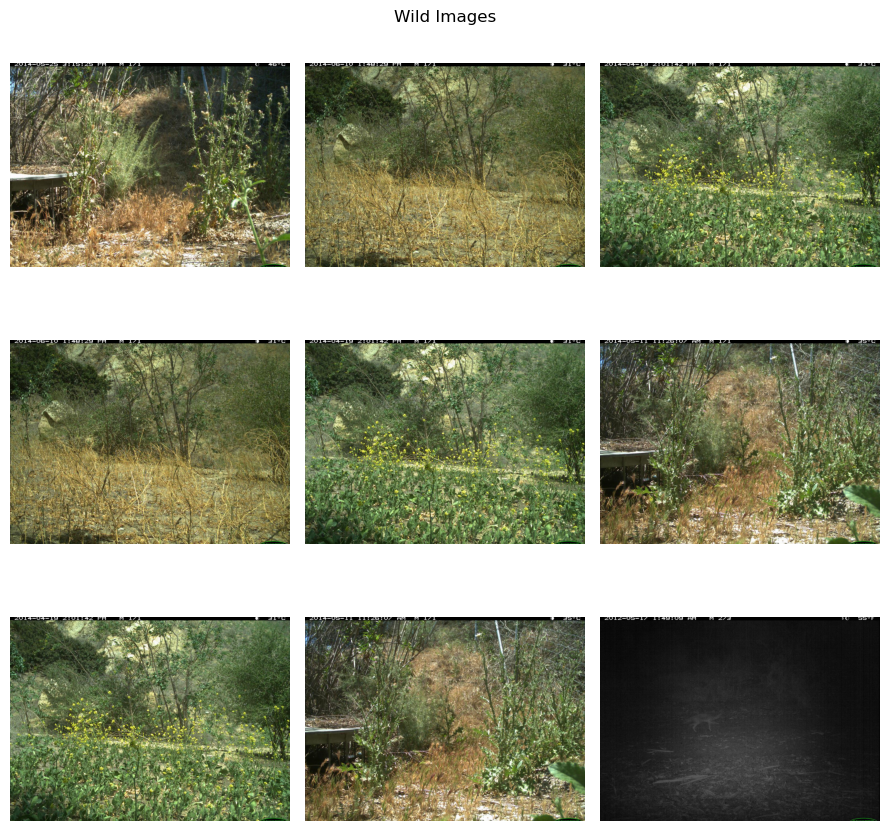

In [114]:
#show a picture
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f, ax = plt.subplots(nrows=3,ncols=3, figsize=(9,9))
# draw a number of images for each location
for i in range(3):
    for j in range(3):
        im = mpimg.imread('extracted_train/'+file_list_train[i+j])
        ax[i, j].imshow(im, resample=True)
        ax[i, j].axis('off')
plt.tight_layout()
plt.suptitle("Wild Images")
plt.show()

In [115]:
#take a look of the csv and labelings
print("Train CSV")
print(train.head(5))
print("")
print("Test CSV")
print(test.head(5))
print(samp.head(5))

Train CSV
   category_id        date_captured                                 file_name  \
0           19  2011-05-13 23:43:18  5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg   
1           19  2012-03-17 03:48:44  588a679f-23d2-11e8-a6a3-ec086b02610b.jpg   
2            0  2014-05-11 11:56:46  59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg   
3            0  2013-10-06 02:00:00  5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg   
4            0  2011-07-12 13:11:16  599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg   

   frame_num                                    id  location  rights_holder  \
0          1  5998cfa4-23d2-11e8-a6a3-ec086b02610b        33   Justin Brown   
1          2  588a679f-23d2-11e8-a6a3-ec086b02610b       115   Justin Brown   
2          1  59279ce3-23d2-11e8-a6a3-ec086b02610b        96  Erin Boydston   
3          1  5a2af4ab-23d2-11e8-a6a3-ec086b02610b        57  Erin Boydston   
4          3  599fbd89-23d2-11e8-a6a3-ec086b02610b        46   Justin Brown   

                            

# Converting Data to 128X128

In [116]:
# import cv2
# import numpy as np
# import os

# data_labels_dict = {
#     "Bison bison": 20,
#     "Pronghorn": 7,
#     "bighorn sheep": 9,
#     "black bear": 12,
#     "bobcat": 16,
#     "cat": 17,
#     "coyote": 11, 
#     "deer": 1,
#     "elk": 6,
#     "fox": 10,
#     "moose": 2,
#     "mountain goat": 21,
#     "mountain lion": 22, 
#     "rabbit": 8,
#     "rodent": 4,
#     "skunk": 14,
#     "small mamal": 5,
#     "squirrel": 3,
#     "wolf": 15
# }

# dir_path = '/kaggle/input/new-train/'
# outpath = '/kaggle/working/'
# direcs = [d for d in os.listdir(dir_path)]

# # Initialize an empty list to store the numpy arrays of images
# image_array_list = []
# labels_list = []
# count = 0

# i = 19 # 0 --> 19

# print(direcs[i])

# new_dir_path = os.path.join(dir_path,direcs[i])
# label = np.zeros((1,23))
# label[0,data_labels_dict.get(direcs[i])] = 1
# for filename in os.listdir(new_dir_path):
#     labels_list.append(label[0])
#     # Load the image as a Pillow Image object
#     image = cv2.imread(os.path.join(new_dir_path,filename))
#     resized = cv2.resize(image, (128,128)).astype('uint8')/255

#     # Convert the Pillow Image object to a numpy array
#     np_array = np.array(resized)

#     # Append the numpy array to the list
#     image_array_list.append(np_array)
#     count+=1
#     if(count>700):
#         break
    
# #saving images and labels

# out_filename = direcs[i]+'.npy'
# out_path = os.path.join(outpath,out_filename)
# np.save(out_path,image_array_list)

# out_filename = direcs[i]+'_label.npy'
# out_path = os.path.join(outpath,out_filename)
# np.save(out_path,labels_list)


In [117]:
# import os
# import numpy as np

# dir_path = '/kaggle/input/new-train/'

# #unnity
# x_train_temp = []
# y_train_temp = []
# outpath = '/kaggle/working/'
# direcs = [d for d in os.listdir(dir_path)]
# for i in range(len(direcs)):
#     if direcs[i]=="mouse":
#         continue
#     out_filename = direcs[i]+'.npy'
#     out_path = os.path.join(outpath,out_filename)
#     arr = np.load(out_path)
#     if (i ==0 ):
#         x_train_temp = arr
#     else:
#         x_train_temp = np.concatenate((x_train_temp,arr),axis=0)
#     print(x_train_temp.shape)
     
# #     out_filename = direcs[i]+'_label.npy'
# #     out_path = os.path.join(outpath,out_filename)
# #     arr = np.load(out_path)
# #     if (i ==0 ):
# #         y_train_temp = arr
# #     else:
# #         y_train_temp = np.concatenate((y_train_temp,arr),axis=0)
# #     print(y_train_temp.shape)
  
    
    
# print("doneeee")
# print(len(x_train_temp))
# x_train_224 = np.array(x_train_temp)
# print(x_train_224.shape)

# # print(len(y_train_temp))
# # y_train_224 = np.array(y_train_temp)
# # print(y_train_224.shape)

# out_filename = 'x_train_224.npy'
# out_path = os.path.join(outpath,out_filename)
# np.save(out_path,x_train_224)

# # out_filename = 'y_train_224.npy'
# # out_path = os.path.join(outpath,out_filename)
# # np.save(out_path,y_train_224)

# **EDA**

In [118]:
print("The number of labels in our train set:")
print(len(train.label.unique()))
classes =train.label.unique()

The number of labels in our train set:
14


           target   label
0           empty  131457
1         opossum   14106
2         raccoon    8623
3          coyote    7209
4          rabbit    6938
5            deer    6102
6          bobcat    5975
7             cat    4759
8        squirrel    3398
9             dog    3035
10         rodent    2210
11          skunk    1361
12            fox    1093
13  mountain_lion      33


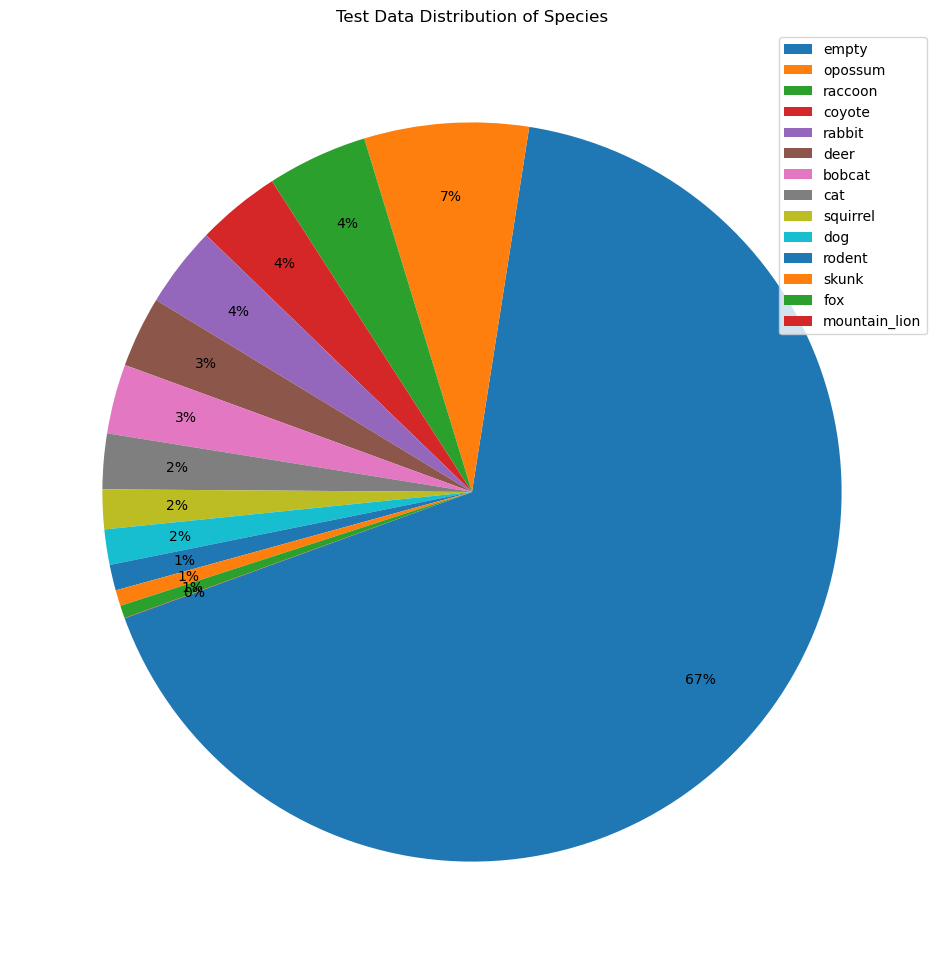

In [119]:
#Distribution of the labels
#The idea was taken from iWildCam basic EDA by Andrew Lukyanenko

target_count = train['label'].value_counts().reset_index().rename(columns={'index': 'target'})
print(target_count)

label= [target_count.target.tolist()]
plt.pie(target_count.label, autopct='%1.0f%%', startangle=200, pctdistance=0.8)
plt.gcf().set_size_inches(12,12)
plt.legend(labels=label[0], loc="best")
# plt.style.use('seaborn')
plt.title("Test Data Distribution of Species")
plt.show()


# Balancing the Data

In [120]:
balanced_train = train.copy()
count = 0
to_delete = balanced_train[balanced_train["category_id"] == 0]
to_delete = to_delete[10000:]
print(balanced_train.shape)
balanced_train = balanced_train.drop(to_delete.index)
print(balanced_train.shape)

(196299, 12)
(74842, 12)


           target  label
0         opossum  14106
1           empty  10000
2         raccoon   8623
3          coyote   7209
4          rabbit   6938
5            deer   6102
6          bobcat   5975
7             cat   4759
8        squirrel   3398
9             dog   3035
10         rodent   2210
11          skunk   1361
12            fox   1093
13  mountain_lion     33


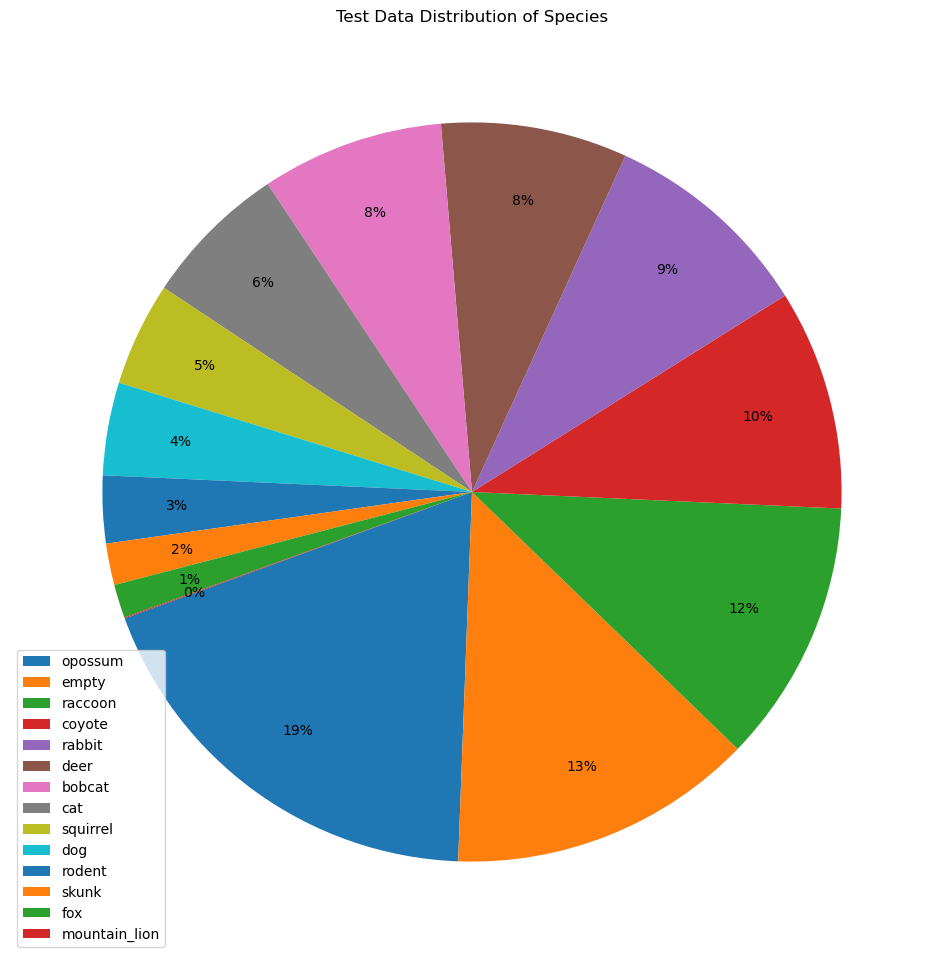

In [121]:
target_count = balanced_train['label'].value_counts().reset_index().rename(columns={'index': 'target'})
print(target_count)

label= [target_count.target.tolist()]
plt.pie(target_count.label, autopct='%1.0f%%', startangle=200, pctdistance=0.8)
plt.gcf().set_size_inches(12,12)
plt.legend(labels=label[0], loc="best")
# plt.style.use('seaborn')
plt.title("Test Data Distribution of Species")
plt.show()

# Predictions

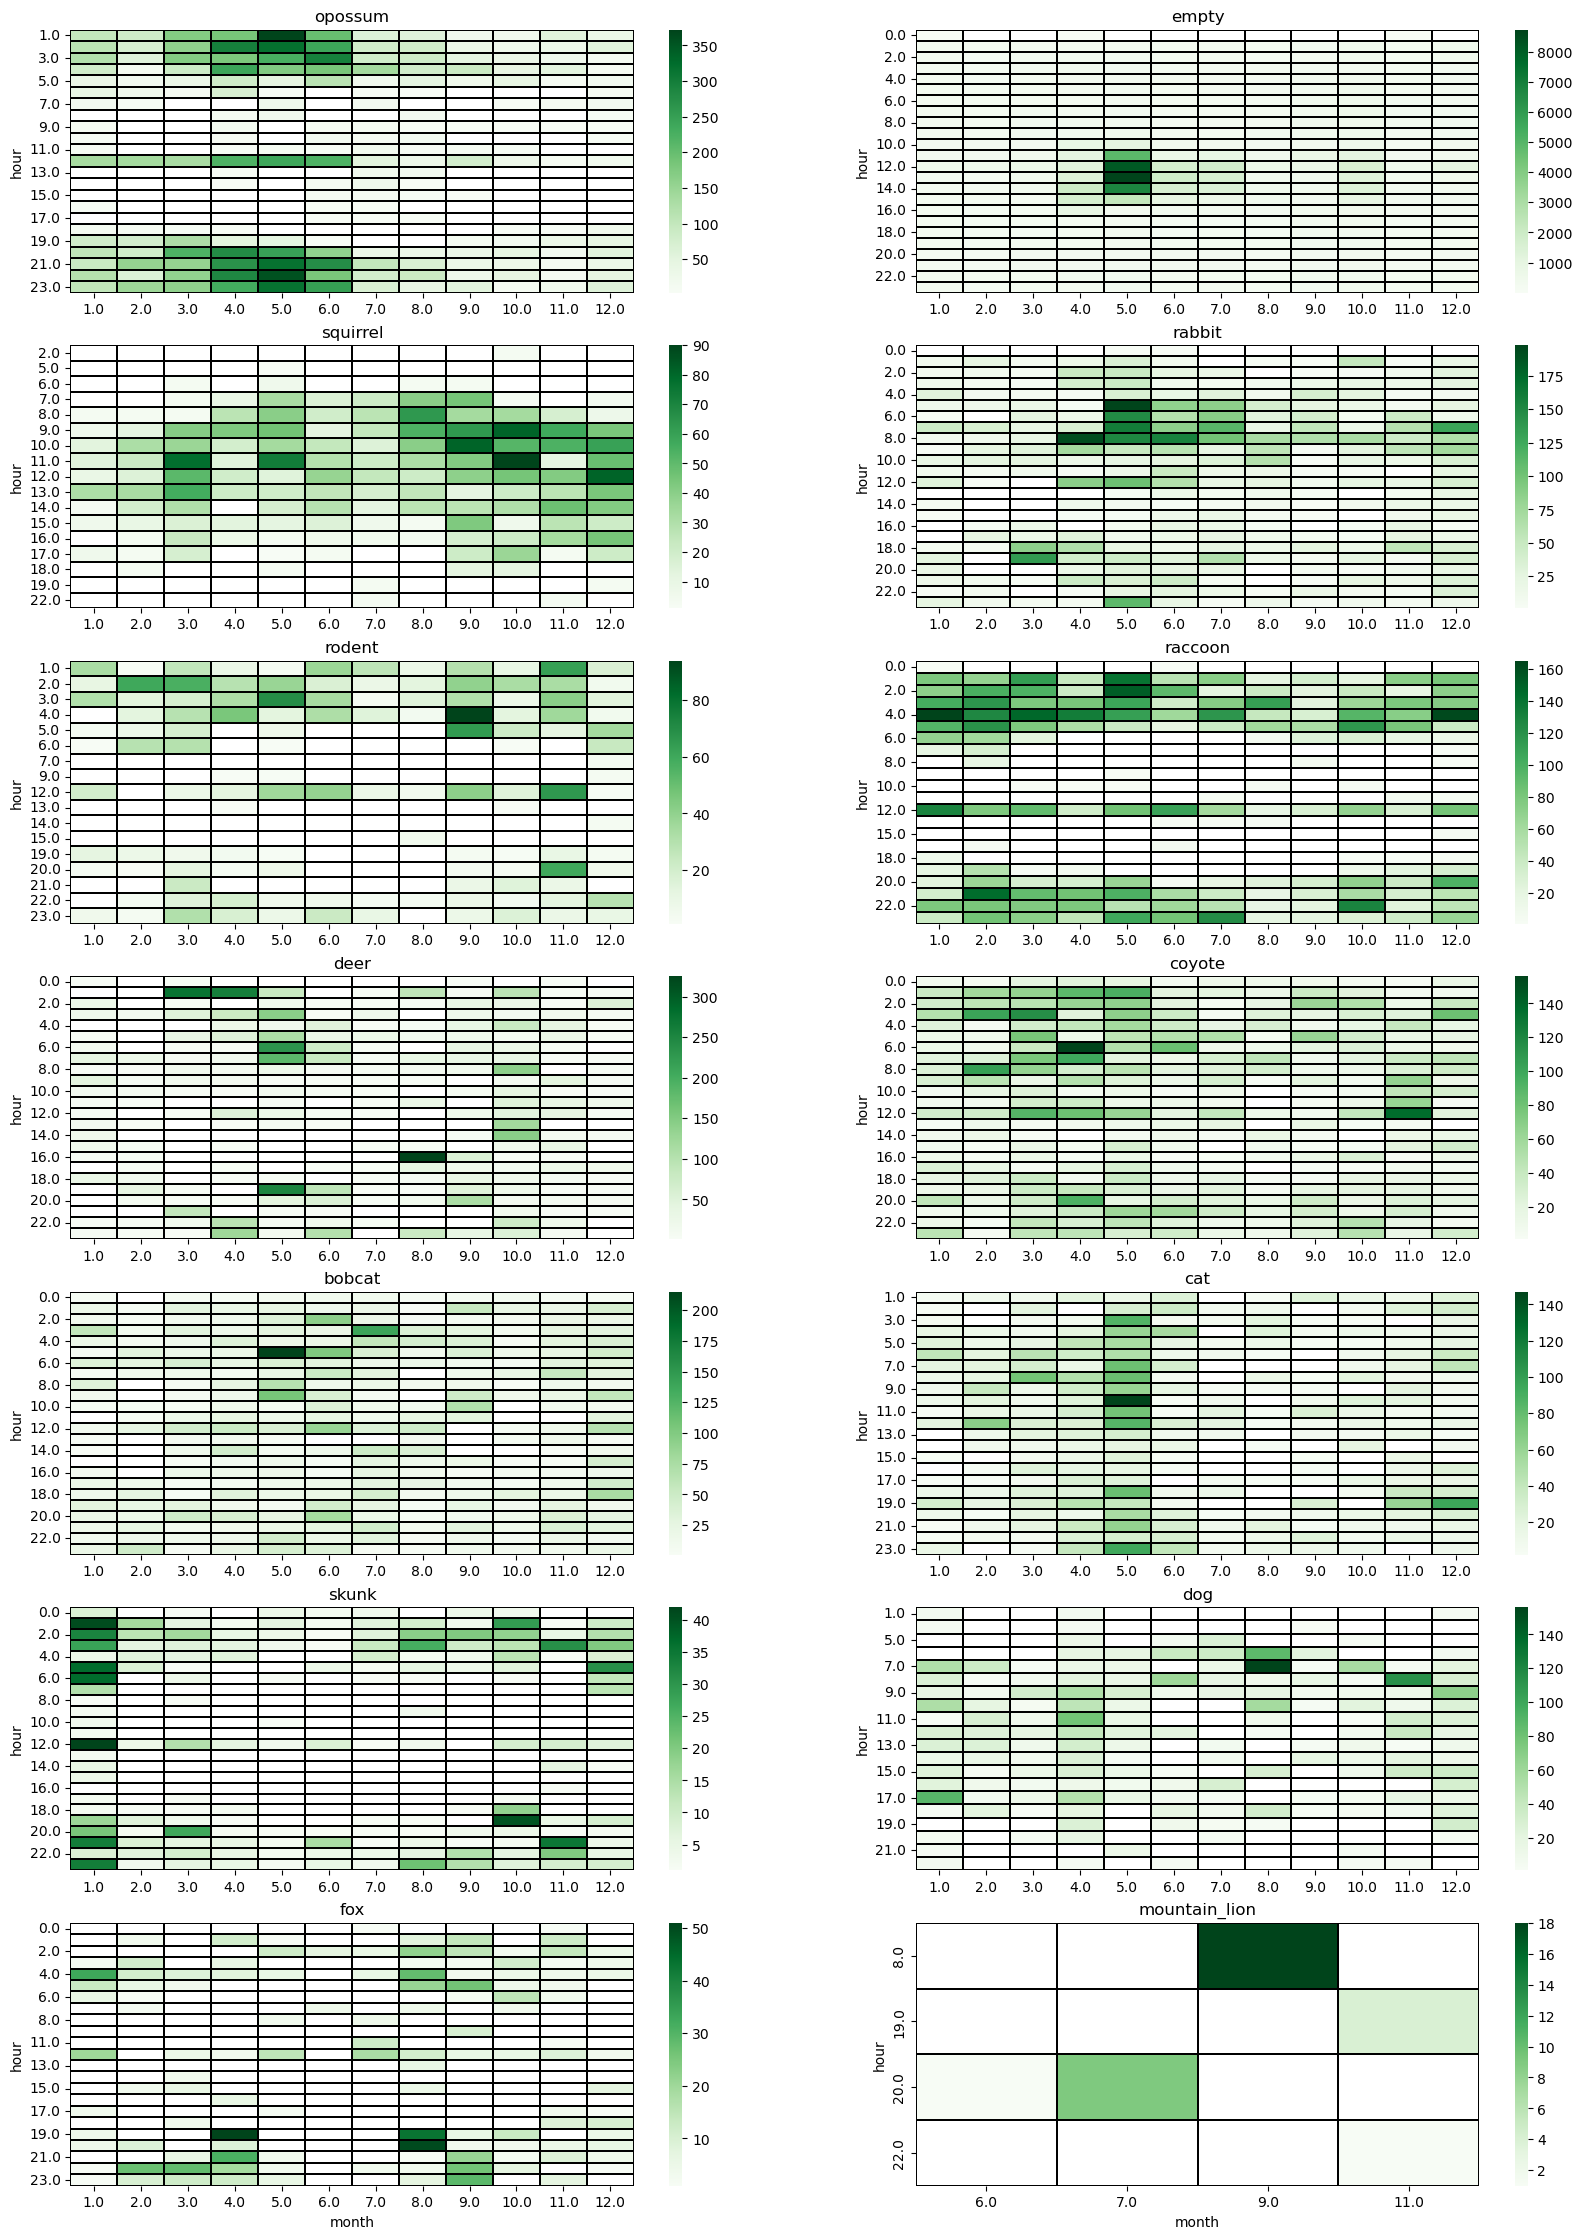

In [122]:
import seaborn as sns
# Taken of the notebook iWildCam2019 EDA and Prediction by Gabriel Preda 
# the datetime

# adding month,time to the train scv
train['date_time'] = pd.to_datetime(train['date_captured'], errors='coerce')
train['month'] = train['date_time'].dt.month
train['hour'] = train['date_time'].dt.hour


fig, ax = plt.subplots(7,2,figsize=(20,28))
i = 0
for class_wild in classes:
    i = i + 1
    plt.subplot(7,2,i)
    tmp = train[train['label'] == class_wild]
    t = pd.DataFrame(tmp.groupby(['month', 'hour'])['seq_id'].count().reset_index())
    m = t.pivot(index='hour', columns='month', values='seq_id')
    s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=False, cmap="Greens")
    if(i<13):
        s.set_xlabel('')    
    s.set_title(class_wild, size=12)

plt.show()

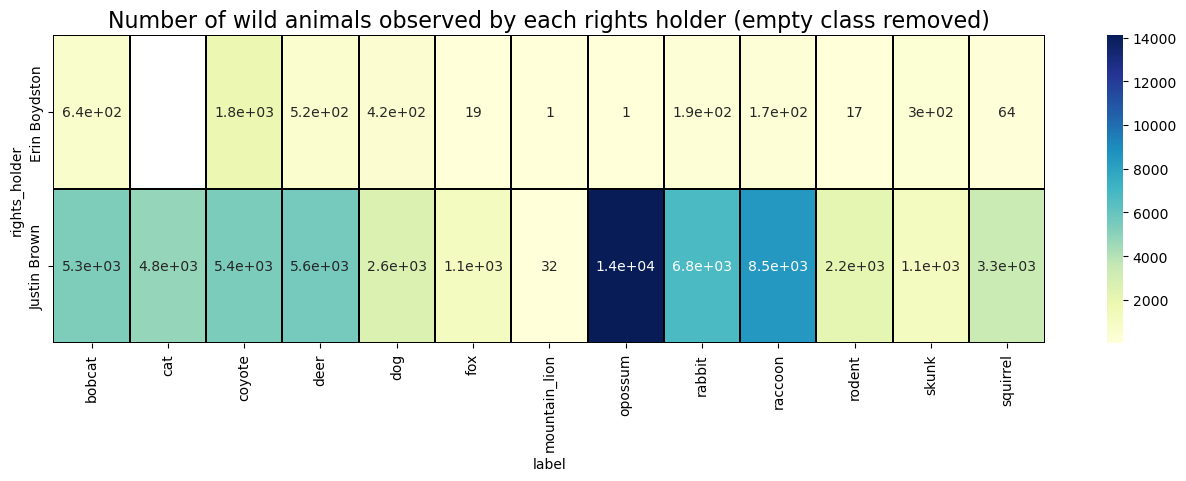

In [123]:
#Taken of the notebook iWildCam2019 EDA and Prediction by Gabriel Preda 
#the right holder

fig, ax = plt.subplots(1,1,figsize=(16,4))
t = pd.DataFrame(train[~(train.label == 'empty')].groupby(['label', 'rights_holder'])['seq_id'].count().reset_index())
m = t.pivot(index='rights_holder', columns='label', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed by each rights holder (empty class removed)', size=16)
plt.show()

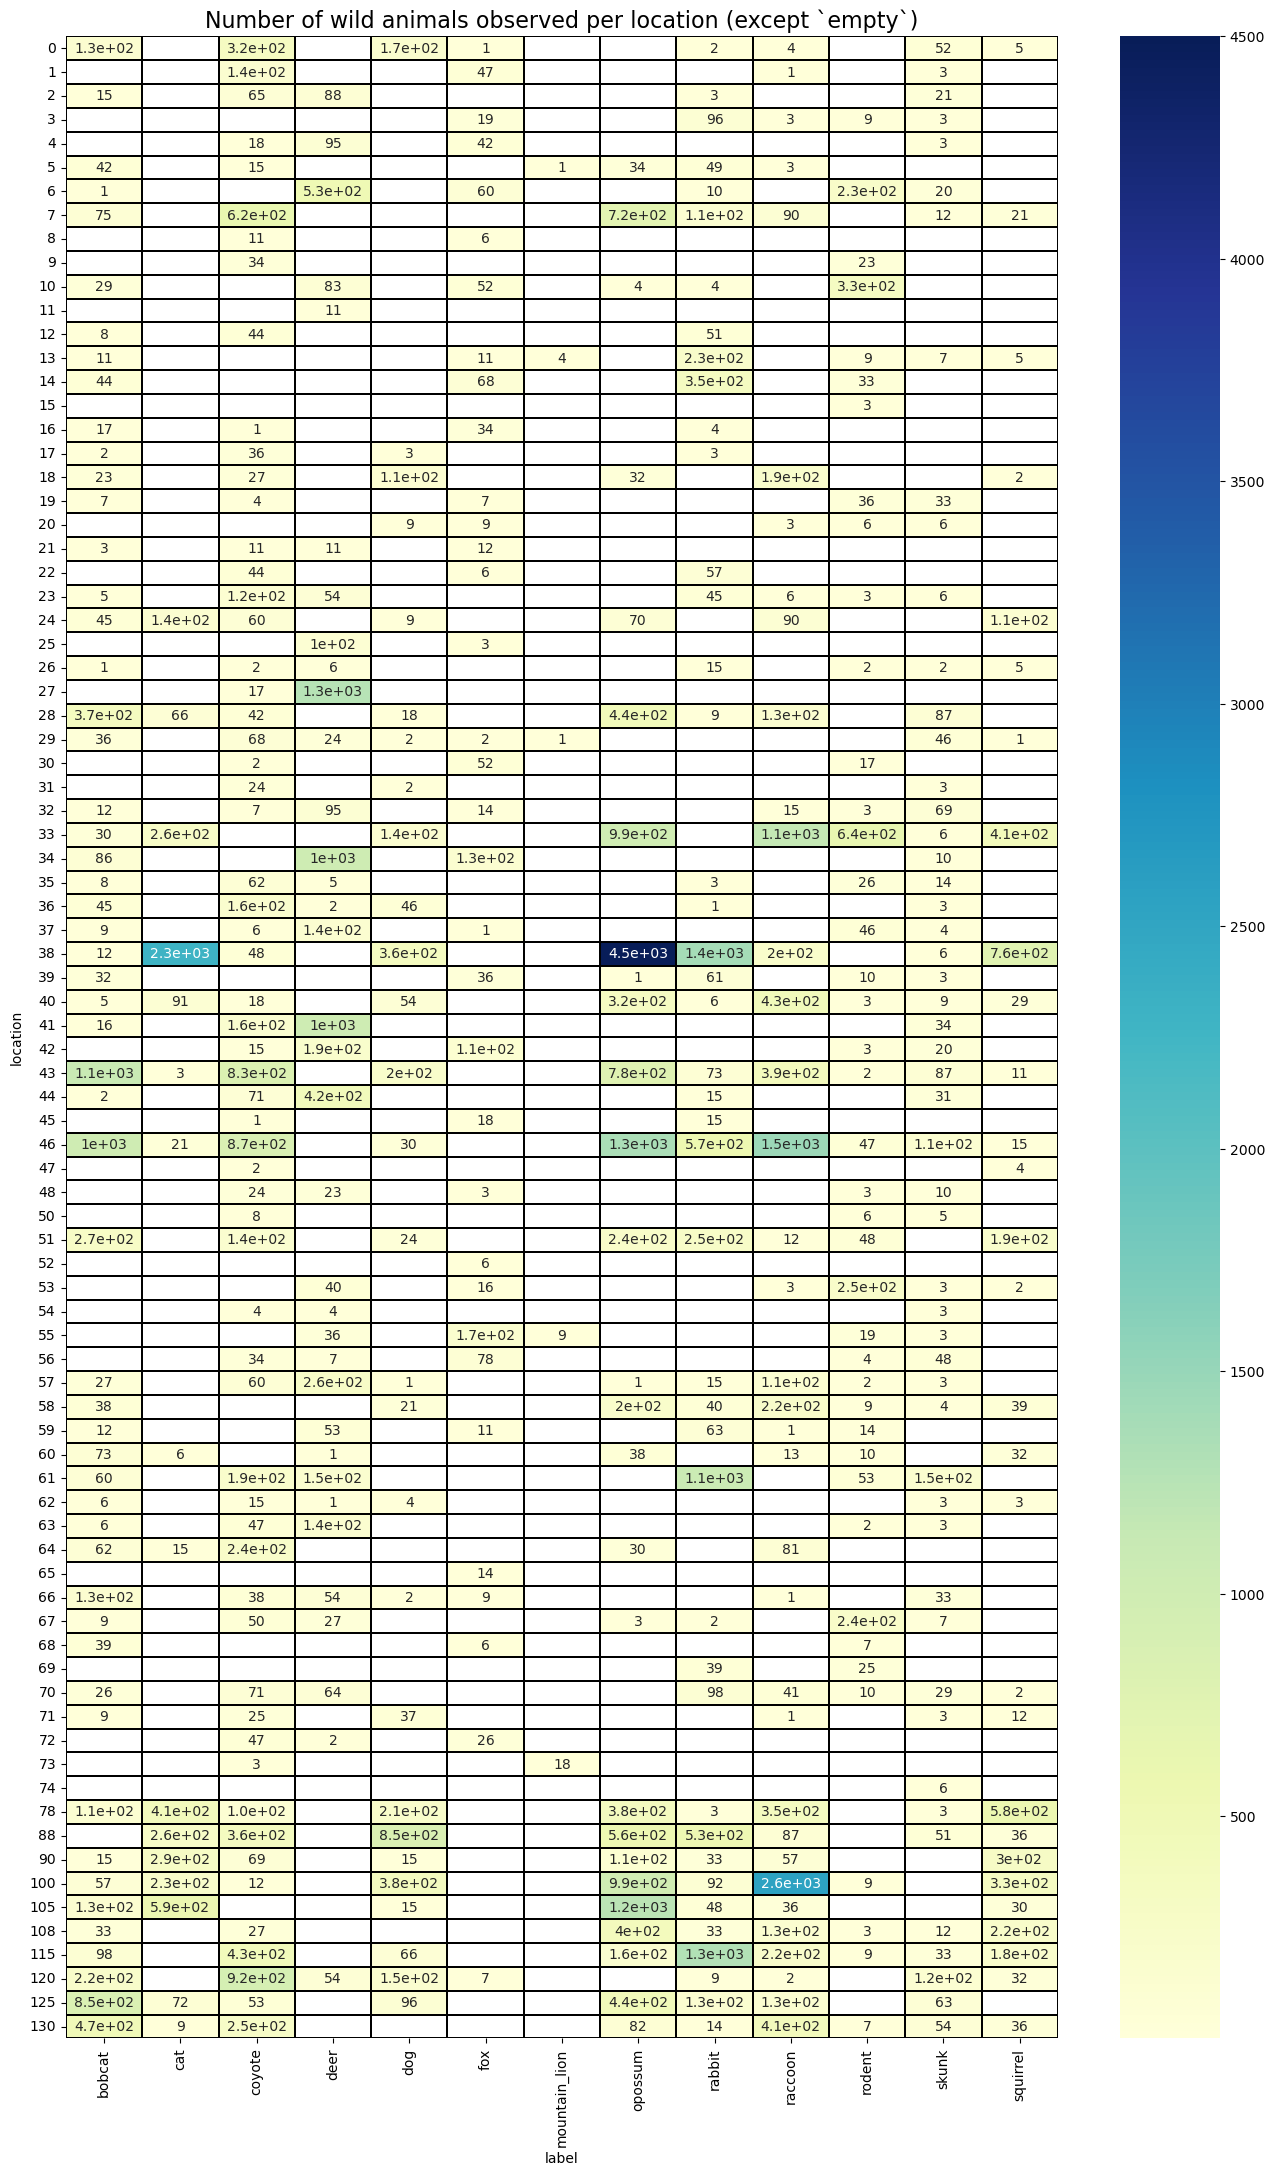

In [124]:
# Taken of the notebook iWildCam2019 EDA and Prediction by Gabriel Preda 
# the location

fig, ax = plt.subplots(1,1,figsize=(16,26))
tmp = train[train['label'] != 'empty']
t = pd.DataFrame(tmp.groupby(['label', 'location'])['seq_id'].count().reset_index())
m = t.pivot(index='location', columns='label', values='seq_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of wild animals observed per location (except `empty`)', size=16)
plt.show()
del t, tmp, m


# Data Loading

In [125]:
x_train = np.load('/kaggle/input/reducing-image-sizes-to-32x32/X_train.npy')
x_test = np.load('/kaggle/input/reducing-image-sizes-to-32x32/X_test.npy')

print(train['label'].tolist()[:5])
labels = train['label'].tolist()

# Convert the string labels to one-hot encoded labels
y_train = np.zeros((len(labels), len(label_dict)))
for i, label in enumerate(labels):
    y_train[i, list(label_dict.values()).index(label)] = 1

['opossum', 'opossum', 'empty', 'empty', 'empty']


In [126]:
balanced_x_train = []
balanced_y_train = []
count = 0
for i in range(len(train)):
    if train.iloc[i]["category_id"] == 0:
        count +=1
        if count > 10000:
            continue
    balanced_x_train.append(x_train[i])
    balanced_y_train.append(y_train[i])
        
balanced_x_train = np.array(balanced_x_train)
balanced_y_train = np.array(balanced_y_train)

In [127]:
print(len(balanced_x_train))
print(len(balanced_y_train))

74842
74842


In [128]:
val_x, train_x = balanced_x_train[:10000,:], balanced_x_train[10000:,:]
print(val_x.shape)
print(train_x.shape)
val_y, train_y = balanced_y_train[:10000,:], balanced_y_train[10000:,:]
print(val_y.shape)
print(train_y.shape)

(10000, 32, 32, 3)
(64842, 32, 32, 3)
(10000, 23)
(64842, 23)


# ViT Training

In [129]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
!pip install --quiet vit-keras
from vit_keras import vit


In [130]:
IMAGE_SIZE = 32
BATCH_SIZE = 80
EPOCHS = 30

classes = label_dict

In [131]:
vit_model = vit.vit_b32(
        image_size = IMAGE_SIZE,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 23)

/opt/conda/lib/python3.7/site-packages/vit_keras/utils.py:83: UserWarning: Resizing position embeddings from 12, 12 to 1, 1
  UserWarning,


In [132]:
print("The image size is:")
print(train_x[0].shape)

The image size is:
(32, 32, 3)


1/1 [==============================] - 3s 3s/step


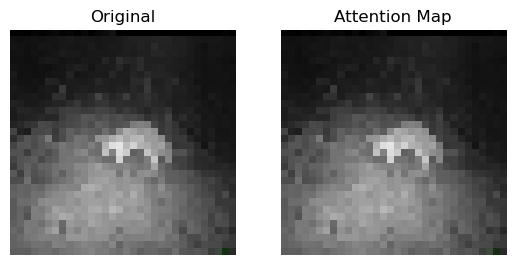

In [133]:
from vit_keras import visualize

image = train_x[2900]

attention_map = visualize.attention_map(model = vit_model, image = image)

# Plot results
fig, (ax1, ax2) = plt.subplots(ncols = 2)
ax1.axis('off')
ax2.axis('off')
ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(image)
_ = ax2.imshow(attention_map)

In [134]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(23, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87418368  
                                                                 
 flatten_1 (Flatten)         (None, 768)               0         
                                                                 
 batch_normalization_2 (Batc  (None, 768)              3072      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 11)                8459      
                                                                 
 batch_normalization_3 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dense_3 (Dense)             (None, 23)         

# Training

In [135]:
learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer, 
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2), 
              metrics = ['accuracy'])

STEP_SIZE_TRAIN = len(train_x) // BATCH_SIZE
STEP_SIZE_VALID = len(val_x) // BATCH_SIZE

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = './model.hdf5',
                                                  monitor = 'val_accuracy', 
                                                  verbose = 1, 
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')

callbacks = [earlystopping, reduce_lr, checkpointer]


history = model.fit(x = train_x, y=train_y, validation_split=0.1, batch_size=BATCH_SIZE, epochs = EPOCHS, callbacks = callbacks)
!mkdir -p saved_model
model.save('saved_model/my_model')

Epoch 1/30
730/730 [==============================] - ETA: 0s - loss: 2.7680 - accuracy: 0.3162
Epoch 1: val_accuracy improved from -inf to 0.52151, saving model to ./model.hdf5
730/730 [==============================] - 99s 97ms/step - loss: 2.7680 - accuracy: 0.3162 - val_loss: 2.4120 - val_accuracy: 0.5215 - lr: 1.0000e-04
Epoch 2/30
730/730 [==============================] - ETA: 0s - loss: 2.3401 - accuracy: 0.5745
Epoch 2: val_accuracy improved from 0.52151 to 0.62591, saving model to ./model.hdf5
730/730 [==============================] - 68s 93ms/step - loss: 2.3401 - accuracy: 0.5745 - val_loss: 2.1750 - val_accuracy: 0.6259 - lr: 1.0000e-04
Epoch 3/30
730/730 [==============================] - ETA: 0s - loss: 2.0663 - accuracy: 0.6689
Epoch 3: val_accuracy improved from 0.62591 to 0.67911, saving model to ./model.hdf5
730/730 [==============================] - 68s 93ms/step - loss: 2.0663 - accuracy: 0.6689 - val_loss: 1.9421 - val_accuracy: 0.6791 - lr: 1.0000e-04
Epoch 4/30

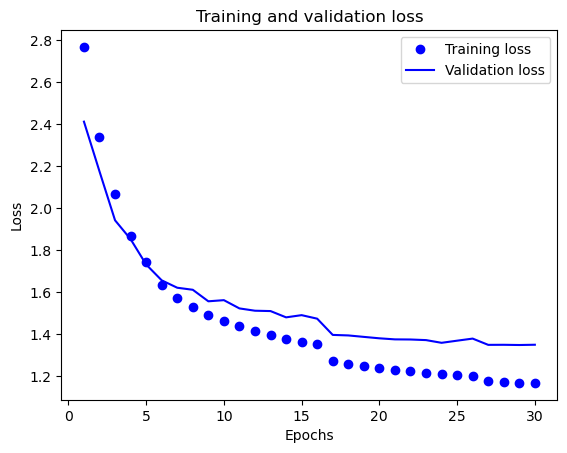

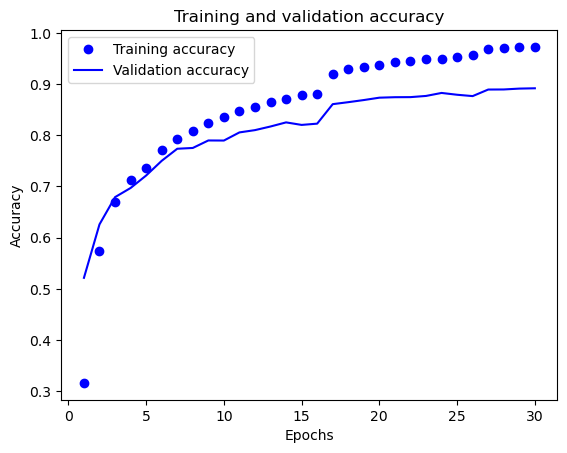

In [136]:
# Plot the training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [137]:
loss, accuracy = model.evaluate(val_x, val_y)
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
print(f"lost: {round(loss , 2)}")

313/313 [==============================] - 8s 26ms/step - loss: 1.4071 - accuracy: 0.8840
Test accuracy: 88.4%
lost: 1.41


# Test (predisction)

In [138]:
y_test = model.predict(x_test)

4805/4805 [==============================] - 130s 26ms/step


# Submission

In [139]:
#submission
#os.mkdir("")
directory="../output/kaggle/working/"
#submission_df = pd.read_csv(os.path.join('/kaggle/input','sample_submission.csv'))
samp['Predicted'] = y_test.argmax(axis=1)

print(samp.shape)
samp.head(3)

(153730, 4)


,Unnamed: 0,Id,Category,Predicted
0,0,b005e5b2-2c0b-11e9-bcad-06f10d5896c4,0,18
1,1,f2347cfe-2c11-11e9-bcad-06f10d5896c4,0,11
2,2,27cf8d26-2c0e-11e9-bcad-06f10d5896c4,0,0


In [140]:
samp.to_csv("submission.csv", index=False)